In [19]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import rasterio as rio
from pyproj import Proj, Transformer, CRS
from pathlib import Path
from wrf import PolarStereographic
from pathlib import Path
from config import daymet_dir, variable_di

In [3]:
paths = list(daymet_dir.glob('*.nc'))

In [5]:
# energy balance (eb) is outside scope, but we'll include it in this analysis
all_var_groups = list(variable_di.keys())
all_var_groups.append("eb")
all_var_groups

['met', 'wf', 'ws', 'eb']

In [8]:
var_group_di = {}
for var_group in all_var_groups:
    var_group_di[var_group] = []

for nc_file in paths:
    
    file_var_group = nc_file.name.split("_")[1]
    var_group_di[file_var_group].append(nc_file)

In [10]:
met_ds = xr.open_mfdataset(var_group_di["met"])
met_ds

<xarray.Dataset>
Dimensions:    (time: 13515, y: 209, x: 299)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2016-12-31T12:00:00
Dimensions without coordinates: y, x
Data variables:
    latitude   (time, y, x) float32 dask.array<chunksize=(366, 209, 299), meta=np.ndarray>
    longitude  (time, y, x) float32 dask.array<chunksize=(366, 209, 299), meta=np.ndarray>
    pcp        (time, y, x) float32 dask.array<chunksize=(366, 209, 299), meta=np.ndarray>
    tmax       (time, y, x) float32 dask.array<chunksize=(366, 209, 299), meta=np.ndarray>
    tmin       (time, y, x) float32 dask.array<chunksize=(366, 209, 299), meta=np.ndarray>
Attributes:
    start_year:                1980
    source:                    Daymet Software Version 3.0
    Version_software:          Daymet Software Version 3.0
    Version_data:              Daymet Data Version 3.0
    Conventions:               CF-1.0
    references:                Please see http://daymet.ornl.gov/ for current...
    title:                     WRF WPS
    history:                   Fri Mar 19 08:45:46 2021: ncatted -a citation,...
    NCO:                       netCDF Operators version 4.9.5 (Homepage = htt...
    nco_openmp_thread_number:  1

In [15]:
month_idxs = met_ds.groupby('time.month').groups
all_january_data = met_ds.isel(time=month_idxs[1])
all_january_data

<xarray.Dataset>
Dimensions:    (time: 1147, y: 209, x: 299)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2016-01-31T12:00:00
Dimensions without coordinates: y, x
Data variables:
    latitude   (time, y, x) float32 dask.array<chunksize=(31, 209, 299), meta=np.ndarray>
    longitude  (time, y, x) float32 dask.array<chunksize=(31, 209, 299), meta=np.ndarray>
    pcp        (time, y, x) float32 dask.array<chunksize=(31, 209, 299), meta=np.ndarray>
    tmax       (time, y, x) float32 dask.array<chunksize=(31, 209, 299), meta=np.ndarray>
    tmin       (time, y, x) float32 dask.array<chunksize=(31, 209, 299), meta=np.ndarray>
Attributes:
    start_year:                1980
    source:                    Daymet Software Version 3.0
    Version_software:          Daymet Software Version 3.0
    Version_data:              Daymet Data Version 3.0
    Conventions:               CF-1.0
    references:                Please see http://daymet.ornl.gov/ for current...
    title:                     WRF WPS
    history:                   Fri Mar 19 08:45:46 2021: ncatted -a citation,...
    NCO:                       netCDF Operators version 4.9.5 (Homepage = htt...
    nco_openmp_thread_number:  1

In [16]:
all_january_data.pcp

<xarray.DataArray 'pcp' (time: 1147, y: 209, x: 299)>
dask.array<getitem, shape=(1147, 209, 299), dtype=float32, chunksize=(31, 209, 299), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T12:00:00 ... 2016-01-31T12:00:00
Dimensions without coordinates: y, x
Attributes:
    remap:         remapped via ESMF_regrid_with_weights: Bilinear
    cell_methods:  area: mean time: sum
    grid_mapping:  lambert_conformal_conic
    units:         mm/day
    long_name:     daily total precipitation

In [20]:
from compute_summaries import project_datacube

In [95]:
ds, profile = project_datacube(all_january_data)
ds

<xarray.Dataset>
Dimensions:    (time: 1147, y: 209, x: 299)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2016-01-31T12:00:00
  * y          (y) float64 -4.04e+06 -4.028e+06 ... -1.556e+06 -1.544e+06
  * x          (x) float64 -1.788e+06 -1.776e+06 ... 1.776e+06 1.788e+06
Data variables:
    latitude   (time, y, x) float32 dask.array<chunksize=(31, 209, 299), meta=np.ndarray>
    longitude  (time, y, x) float32 dask.array<chunksize=(31, 209, 299), meta=np.ndarray>
    pcp        (time, y, x) float32 dask.array<chunksize=(31, 209, 299), meta=np.ndarray>
    tmax       (time, y, x) float32 dask.array<chunksize=(31, 209, 299), meta=np.ndarray>
    tmin       (time, y, x) float32 dask.array<chunksize=(31, 209, 299), meta=np.ndarray>
Attributes:
    start_year:                1980
    source:                    Daymet Software Version 3.0
    Version_software:          Daymet Software Version 3.0
    Version_data:              Daymet Data Version 3.0
    Conventions:               CF-1.0
    references:                Please see http://daymet.ornl.gov/ for current...
    title:                     WRF WPS
    history:                   Fri Mar 19 08:45:46 2021: ncatted -a citation,...
    NCO:                       netCDF Operators version 4.9.5 (Homepage = htt...
    nco_openmp_thread_number:  1

In [127]:
wrf_proj_str = PolarStereographic(**{"TRUELAT1": 64, "STAND_LON": -150}).proj4()
wrf_proj = Proj(wrf_proj_str)
wgs_proj = Proj(proj='latlong', datum='WGS84')
    
transformer = Transformer.from_proj(wgs_proj, wrf_proj)
xcoord, ycoord = transformer.transform(-147, 65)

In [140]:
da = ds["tmin"].sel(x=xcoord, y=ycoord, method="nearest")

In [141]:
da

<xarray.DataArray 'tmin' (time: 1147)>
dask.array<getitem, shape=(1147,), dtype=float32, chunksize=(31,), chunktype=numpy.ndarray>
Coordinates:
    latitude   (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
    longitude  (time) float32 dask.array<chunksize=(31,), meta=np.ndarray>
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2016-01-31T12:00:00
    y          float64 -2.672e+06
    x          float64 1.44e+05
Attributes:
    remap:         remapped via ESMF_regrid_with_weights: Bilinear
    long_name:     daily maximum temperature
    units:         degrees C
    grid_mapping:  lambert_conformal_conic
    cell_methods:  area: mean time: maximum

(array([ 14.,  80., 107., 151., 178., 198., 209., 132.,  66.,  12.]),
 array([-48.        , -43.15000153, -38.29999924, -33.45000076,
        -28.60000038, -23.75      , -18.89999962, -14.05000019,
         -9.19999981,  -4.3499999 ,   0.5       ]),
 <BarContainer object of 10 artists>)

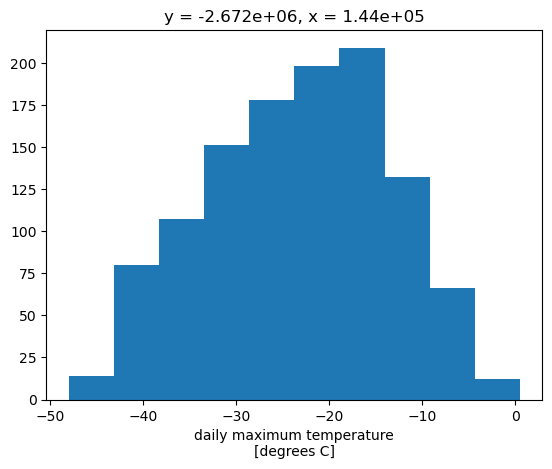

In [142]:
da.plot.hist()

<AxesSubplot: ylabel='Density'>

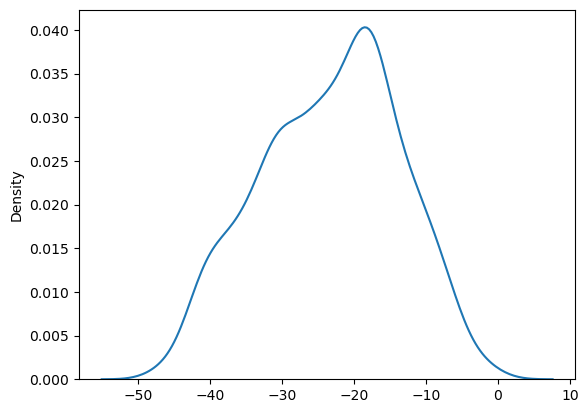

In [143]:
sns.kdeplot(da)

In [139]:
1147/31

37.0

/tmp/ipykernel_12907/1489236333.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(da.values)
/home/UA/cparr4/miniconda3/envs/snap-geo/lib/python3.9/site-packages/seaborn/distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/UA/cparr4/miniconda3/envs/snap-geo/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/UA/cparr4/miniconda3/envs/snap-geo/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<AxesSubplot: >

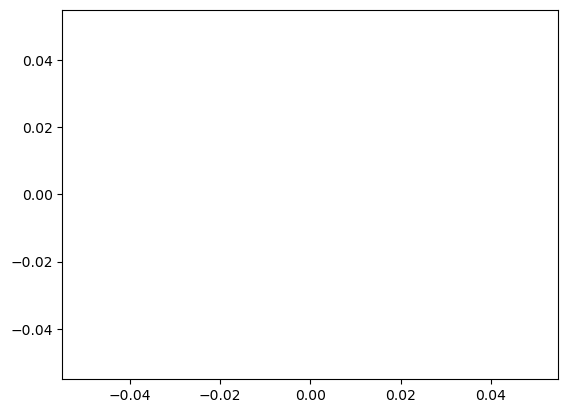

In [105]:
sns.distplot(da.values)